### Data Preprocessing ###

#### Data Cleaning ####

* Noisy Data
* Missing Data Analysis
* Outlier Analysis

#### Data Standardization - Feature Scaling ####

* Normalizasyon(0-1)
* Standardization(z-score)
* Log Transformation

#### Data Reduction ####

* Reducing the number of observations
* Reducing the number of variables

#### Variable Transformation ####

* Transformation for Categorical Variablesm

### For single variable ###

#### Outlier variables/observations ####

Threshold Value

We define threshold value,the mean of numbers and add one,two or three std.In addition we define outlier value the high and low value of this value.

Threshold Value = Mean + 1 X Std,
Threshold Value = Mean + 2 X Std or
Threshold Value = Mean + 3 X Std

#### Standardization(z-score) ####

Value implement normal distribution so İt is standardized and we define threshold value adding +-2 from this distribution.In addition we define outlier value the high and low value of this value.m 

#### Boxplot(Interquartile Range-IQR) ####

In [446]:
import seaborn as sns
import pandas as pd
import numpy as np

In [447]:
tip=sns.load_dataset('tips')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [448]:
tip_tip=tip['tip']

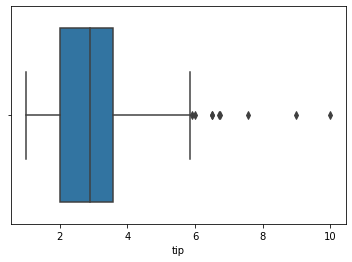

In [449]:
sns.boxplot(x=tip_tip);

* IQR=1,5X(Q3-Q1)
* Lower threshold value=Q1-IQR
* Upper threshold value=Q3+IQR

In [450]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


'select_dtypes' select that you select data types

In [451]:
tip=tip.select_dtypes(include = ['float64', 'int64'])
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


'dropna()' delete missing value in a data

In [452]:
tip=tip.dropna()
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [453]:
tip.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [454]:
tip_tip=tip['tip']
tip_tip.head(10)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
5    4.71
6    2.00
7    3.12
8    1.96
9    3.23
Name: tip, dtype: float64

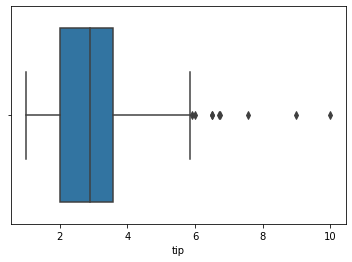

In [455]:
sns.boxplot(x=tip_tip);

In [456]:
Q1=tip_tip.quantile(0.25)
Q1

2.0

In [457]:
Q3=tip_tip.quantile(0.75)
Q3

3.5624999999999996

In [458]:
IQR=(Q3-Q1)*1.5
IQR

2.343749999999999

* Lower threshold value=Q1-IQR
* Upper threshold value=Q3+IQR

In [459]:
lo=Q1-IQR
lo

-0.3437499999999991

In [460]:
up=Q3+IQR
up

5.906249999999998

In [461]:
di=tip_tip<lo
di

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: tip, Length: 244, dtype: bool

list of lower threshold value

In [462]:
tip_tip[di]

Series([], Name: tip, dtype: float64)

In [463]:
di_2=tip_tip>up
di_2

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240    False
241    False
242    False
243    False
Name: tip, Length: 244, dtype: bool

In [464]:
tip_tip[di_2]

23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64

These are omtlier detections

In [465]:
tip_size[di_2].index

Int64Index([23, 47, 59, 141, 170, 183, 212, 214, 239], dtype='int64')

### For single variables ###

#### METHODS OF CORRECTING ####

#### 1- remove ####

The simplest solution is to remove that observation.

In [466]:
tip_tip.shape

(244,)

In [467]:
tip_tip=pd.DataFrame(tip_tip)

In [468]:
tip_tip.shape

(244, 1)

In [469]:
tip_tip_t=tip_tip[~((tip_tip<lo)|(tip_tip>up)).any(axis=1)]
tip_tip_t

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
238,4.67
240,2.00
241,2.00
242,1.75


'~' selects values within threshold values or coditions.

In [470]:
tip_tip_t.shape

(235, 1)

In [471]:
tip_tip.shape

(244, 1)

#### 2-Fill the mean ####

An alternative option is to use the mean or median of that attribute to fill the gap. 

In [472]:
tip_tip[di]

,tip


In [473]:
tip_tip[di_2]

,tip
23,7.58
47,6.00
59,6.73
141,6.70
170,10.00
183,6.50
212,9.00
214,6.50
239,5.92


In [474]:
tip_tip[di_2]=tip_size.mean()

In [475]:
tip_tip[di_2]

,tip
23,2.569672
47,2.569672
59,2.569672
141,2.569672
170,2.569672
183,2.569672
212,2.569672
214,2.569672
239,2.569672


Look at please changing of those up or low the threshold values

#### 3- Suppression of Data ####

Using the backward/forward fill method is another approach that can be applied.

In [476]:
tip_2=sns.load_dataset('tips')
tip_2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [477]:
tip_2=tip_2.select_dtypes(include=['float64', 'int64'])
tip_2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [478]:
tip_2=tip_2.dropna()
tip_2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [479]:
tip_2.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [480]:
tip_2_tip=tip_2['tip']
tip_2_tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [481]:
Q1=tip_2_tip.quantile(0.25)
Q1

2.0

In [482]:
Q2=tip_2_tip.quantile(0.25)
Q2

2.0

In [483]:
IQR=(Q3-Q1)*1.5
IQR

2.343749999999999

In [484]:
lo_2=Q1-IQR
lo_2

-0.3437499999999991

In [485]:
up_2=Q3+IQR
up_2

5.906249999999998

In [486]:
di_2=tip_2_tip<lo_2
di_2

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: tip, Length: 244, dtype: bool

In [487]:
tip_size[di_2]

Series([], Name: size, dtype: int64)

In [488]:
di_3=tip_2_tip>up_2
di_3

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240    False
241    False
242    False
243    False
Name: tip, Length: 244, dtype: bool

In [489]:
tip_2_tip[di_3]

23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64

In [490]:
tip_2_tip[di_3]=up_2

c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [491]:
tip_2_tip[di_3]

23     5.90625
47     5.90625
59     5.90625
141    5.90625
170    5.90625
183    5.90625
212    5.90625
214    5.90625
239    5.90625
Name: tip, dtype: float64

### For multiple variables ###

#### Local Outlier Factor ####

When a point is considered as an outlier based on its local neighborhood, it is a local outlier. LOF will identify an outlier considering the density of the neighborhood. LOF performs well when the density of the data is not the same throughout the dataset.

In [492]:
import seaborn as sns
import pandas as pd
import numpy as np

In [493]:
tip=sns.load_dataset('tips')
tip.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [494]:
tip=tip.select_dtypes(include=['float64', 'int64'])
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [495]:
tip=tip.dropna()
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [496]:
import numpy as np

In [497]:
from sklearn.neighbors import LocalOutlierFactor

In [498]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [499]:
clf.fit_predict(tip)[:5]

array([1, 1, 1, 1, 1])

In [500]:
score=clf.negative_outlier_factor_
score[:5]

array([-1.2259471 , -1.00746956, -1.00220147, -1.02155569, -0.99932425])

In [501]:
np.sort(score)[:10]

array([-3.30666549, -2.33154258, -2.18736263, -1.98330455, -1.81981065,
       -1.79815601, -1.73853455, -1.67893803, -1.67288622, -1.64176048])

In [502]:
threshold_value=np.sort(score)[1]
threshold_value

-2.3315425779168937

My threshold value is -2.3315,Any values out this value is for me outlier observation.

#### 1- remove ####

Here's the following values are outlier observation.m

In [503]:
outlier_tip=score>threshold_value
outlier_tip

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [504]:
tip_n=tip[score<threshold_value]
tip_n

,total_bill,tip,size
67,3.07,1.0,1


#### 2- Suppression of Data ####

We have values without the index with this function to_records'.

In [505]:
a=tip_n.to_records(index=False)
a

rec.array([(3.07, 1., 1)],
          dtype=[('total_bill', '<f8'), ('tip', '<f8'), ('size', '<i8')])

In [506]:
new_threshold_value=tip[score==threshold_value]
new_threshold_value

,total_bill,tip,size
172,7.25,5.15,2


In [507]:
a[:]=b

In [508]:
tip_n=pd.DataFrame(a, index=tip_n.index)

In [509]:
tip_n

,total_bill,tip,size
67,7.25,5.15,2


In [510]:
new_threshold_value

,total_bill,tip,size
172,7.25,5.15,2
